# DBTL 0.2 data analysis

This notebook analyzes OD350 and OD600 data from DBTL cycle 0.2 of flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug

   - `data/indigoidine/cycle1_batch1_data.csv` - production data


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

## User parameters

In [2]:
CYCLE = 0.2

user_params = {
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
#     'productID': 'CID:160478:Flaviolin',
#     'protocol_name': 'OD350',
    'measurement_file': f'../data/flaviolin/DBTL{CYCLE}/OD.xlsx'
#     'time_point': 48,
    } 

In [12]:
indices = ['A','B','C','D','E','F']
df_600 = pd.read_excel(user_params['measurement_file'], sheet_name='600', index_col=None)
df_600['Row'] = indices
df_600 = df_600.set_index('Row')
df_600.head()

,1,2,3,4,5,6,7,8,9
Row,,,,,,,,,
A,0.0637,0.0592,0.0590,0.0837,0.0703,0.0735,0.0582,0.0801,0.0365
B,0.0713,0.0555,0.0652,0.0739,0.0553,0.0826,0.0850,0.0807,0.0469
C,0.0646,0.0660,0.0559,0.0529,0.0655,0.0579,0.0506,0.0670,0.0474
D,0.0684,0.0728,0.0890,0.0796,0.0701,0.0604,0.0355,0.1384,0.0466
E,0.0727,0.0602,0.0669,0.0517,0.0516,0.0786,0.0856,0.0360,0.0465


In [30]:
zero_value = df_600.at['A',9]

Normalize

In [31]:
df_600.loc[:, df_600.columns] -= zero_value
df_600

,1,2,3,4,5,6,7,8,9
Row,,,,,,,,,
A,0.0272,0.0227,0.0225,0.0472,0.0338,0.0370,0.0217,0.0436,0.0000
B,0.0348,0.0190,0.0287,0.0374,0.0188,0.0461,0.0485,0.0442,0.0104
C,0.0281,0.0295,0.0194,0.0164,0.0290,0.0214,0.0141,0.0305,0.0109
D,0.0319,0.0363,0.0525,0.0431,0.0336,0.0239,-0.0010,0.1019,0.0101
E,0.0362,0.0237,0.0304,0.0152,0.0151,0.0421,0.0491,-0.0005,0.0100
F,0.0239,0.0247,0.0351,0.0516,0.0267,-0.0001,0.0003,0.0001,0.0110


Negative to zero

In [34]:
df_600[df_600 < 0] = 0
df_600.drop(columns=9, inplace=True)
df_600

,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,0.0272,0.0227,0.0225,0.0472,0.0338,0.0370,0.0217,0.0436
B,0.0348,0.0190,0.0287,0.0374,0.0188,0.0461,0.0485,0.0442
C,0.0281,0.0295,0.0194,0.0164,0.0290,0.0214,0.0141,0.0305
D,0.0319,0.0363,0.0525,0.0431,0.0336,0.0239,0.0000,0.1019
E,0.0362,0.0237,0.0304,0.0152,0.0151,0.0421,0.0491,0.0000
F,0.0239,0.0247,0.0351,0.0516,0.0267,0.0000,0.0003,0.0001


In [35]:
df_340 = pd.read_excel(user_params['measurement_file'], sheet_name='340', index_col=None)
df_340['Row'] = indices
df_340 = df_340.set_index('Row')
df_340.head()

,1,2,3,4,5,6,7,8,9
Row,,,,,,,,,
A,0.1881,0.1844,0.1870,0.2359,0.2106,0.2164,0.1804,0.2250,0.1189
B,0.2318,0.1913,0.2044,0.2130,0.1781,0.2291,0.2413,0.2331,0.1353
C,0.1995,0.1976,0.1809,0.1741,0.1999,0.1879,0.1730,0.1972,0.1357
D,0.1988,0.2164,0.2440,0.2314,0.2047,0.1802,0.1188,0.3143,0.1355
E,0.2153,0.1934,0.2052,0.1751,0.1724,0.2380,0.2454,0.1214,0.1360


In [36]:
zero_value = df_340.at['A',9]
df_340.loc[:, df_340.columns] -= zero_value
df_340[df_340 < 0] = 0
df_340.drop(columns=9, inplace=True)
df_340

,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,0.0692,0.0655,0.0681,0.1170,0.0917,0.0975,0.0615,0.1061
B,0.1129,0.0724,0.0855,0.0941,0.0592,0.1102,0.1224,0.1142
C,0.0806,0.0787,0.0620,0.0552,0.0810,0.0690,0.0541,0.0783
D,0.0799,0.0975,0.1251,0.1125,0.0858,0.0613,0.0000,0.1954
E,0.0964,0.0745,0.0863,0.0562,0.0535,0.1191,0.1265,0.0025
F,0.0718,0.0718,0.0944,0.1347,0.0798,0.0047,0.0051,0.0047


In [19]:
# find_well = lambda x: x.name[4:6]
# find_row = lambda x: x.name[4]
# find_col= lambda x: x.name[5]

In [20]:
# # df['Well'] = df.apply(find_well, axis=1)
# df['Row'] =  df.apply(find_row, axis=1)
# df['Column'] =  df.apply(find_col, axis=1)

In [21]:
df

,Measurement Type,Time,Value,Units,Well,Row,Column
Line Name,,,,,,,
C0_WA1_biomek-R1,CID:160478:Flaviolin,48,0.039563,NaN,A1,A,1
C0_WB1_biomek-R2,CID:160478:Flaviolin,48,0.073779,NaN,B1,B,1
C0_WC1_biomek-R3,CID:160478:Flaviolin,48,0.082351,NaN,C1,C,1
C0_WD1_biomek-R4,CID:160478:Flaviolin,48,0.149748,NaN,D1,D,1
C0_WE1_biomek-R5,CID:160478:Flaviolin,48,0.204138,NaN,E1,E,1
C0_WF1_biomek-R6,CID:160478:Flaviolin,48,0.217884,NaN,F1,F,1
C0_WA2_biomek-R7,CID:160478:Flaviolin,48,-0.018005,NaN,A2,A,2
C0_WB2_biomek-R8,CID:160478:Flaviolin,48,0.040154,NaN,B2,B,2
C0_WC2_biomek-R9,CID:160478:Flaviolin,48,-0.037958,NaN,C2,C,2


In [ ]:
# df['Measurement Type'] = 'OD600'
# df['Value'] = OD600.T.ravel()

In [ ]:
# df_od340 = df.copy()
# df_od340['Measurement Type'] = 'OD340'
# df_od340['Value'] = OD340.T.ravel()

# df_ratio = df.copy()
# df_ratio['Measurement Type'] = 'OD340/OD600'
# df_ratio['Value'] = OD340.T.ravel() / OD600.T.ravel()

# df = df.append(df_od340)

In [27]:
# data = df.pivot('Row', 'Column')['Value']

In [ ]:
data_od600 = df[df['Measurement Type']=='OD600'].pivot('Row', 'Column')['Value']
data_od340 = df[df['Measurement Type']=='OD340'].pivot('Row', 'Column')['Value']
data_ratio = df_ratio[df_ratio['Measurement Type']=='OD340/OD600'].pivot('Row', 'Column')['Value']

In [43]:
ratio = df_340.values / df_600.values
df_ratio = pd.DataFrame(ratio, index=df_600.index, columns=df_600.columns)
df_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ratio

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


,1,2,3,4,5,6,7,8
Row,,,,,,,,
A,2.544118,2.885463,3.026667,2.478814,2.713018,2.635135,2.834101,2.433486
B,3.244253,3.810526,2.979094,2.516043,3.148936,2.390456,2.523711,2.583710
C,2.868327,2.667797,3.195876,3.365854,2.793103,3.224299,3.836879,2.567213
D,2.504702,2.685950,2.382857,2.610209,2.553571,2.564854,NaN,1.917566
E,2.662983,3.143460,2.838816,3.697368,3.543046,2.828979,2.576375,NaN
F,3.004184,2.906883,2.689459,2.610465,2.988764,NaN,17.000000,47.000000


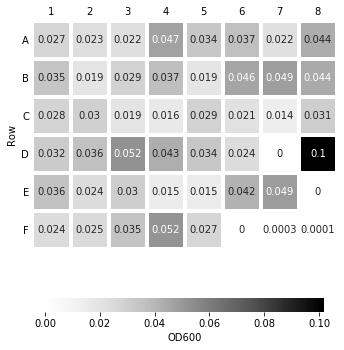

In [47]:
fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(data=df_600, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Greys", #Greys, YlGn
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.5,
                           'label': 'OD600'
                          },
                 annot = True,
                )
# ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation = 0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD600.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

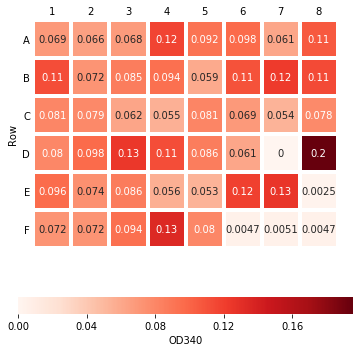

In [46]:
fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(df_340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Reds", # Reds, OrRd
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                )
# ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

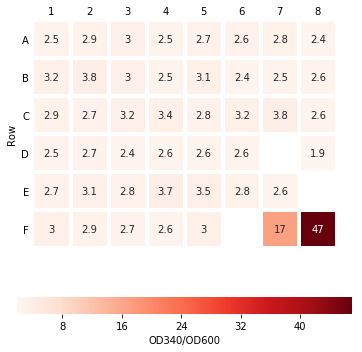

In [48]:
fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(df_ratio, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Reds", # Reds, OrRd
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340/OD600'
                          },
                 annot = True,
                )
# ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340_OD600.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.set_theme(style="whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Type',
              y='Value',
              hue='Measurement Type'
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel=None)
fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

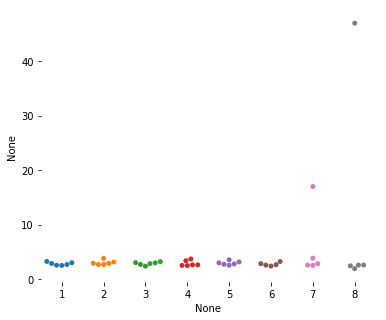

In [51]:
fig, ax = plt.subplots(figsize=(6, 5))
# sns.set_theme(style="whitegrid")
sns.swarmplot(data=df_ratio, 
              linewidth=0,
#               x='Type',
#               y='Value',
              )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel=None)
# ax.set_ylim([0, 2.5])
fig.savefig(
    f"{user_params['output_file_path']}/swarm_ratio.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

Coefficient of variation

In [ ]:
df_simplified = df.drop(columns=['Time', 'Units', 'Row', 'Column'])


In [ ]:
stats = df_simplified.groupby(['Measurement Type', 'Type']).mean()
stats.rename(columns={'Value': 'mean'}, inplace=True)
stats['std'] = df_simplified.groupby(['Measurement Type', 'Type']).std()
stats['CV'] = stats['std'] / stats['mean']
stats

In [ ]:
df_success = df_simplified[df_simplified['Value']>0]


In [ ]:
stats_success = df_success.groupby(['Measurement Type', 'Type']).mean()
stats_success.rename(columns={'Value': 'mean'}, inplace=True)
stats_success['std'] = df_success.groupby(['Measurement Type', 'Type']).std()
stats_success['CV[%]'] = 100*stats_success['std'] / stats_success['mean']
stats_success

In [ ]:
stats_ratio = df_ratio.drop(columns=['Time', 'Units']).groupby(['Measurement Type', 'Type']).mean()
stats_ratio.rename(columns={'Value': 'mean'}, inplace=True)
stats_ratio['std'] = df_ratio.drop(columns=['Time', 'Units']).groupby(['Measurement Type', 'Type']).std()
stats_ratio['CV[%]'] = 100*stats_ratio['std']/stats_ratio['mean']

In [ ]:
stats_success = stats_success.append(stats_ratio)
stats_success

In [37]:
plt.setp(ax.get_yticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

[None, None, None, None, None, None, None, None, None, None, None, None]